### Daten erzeugen

X ist eine bivariate Gauss Verteilung.
y ist eine lineare Transformation der ersten Koordinate, mit Noise



In [1]:
import numpy as np

def generate_without_missing_values(n_samples, rng=42):
    mean = [0, 0]
    cov = [[1, 0.9], [0.9, 1]]
    if not isinstance(rng, np.random.RandomState):
        rng = np.random.RandomState(rng)
    X = rng.multivariate_normal(mean, cov, size=n_samples)

    epsilon = 0.1 * rng.randn(n_samples)
    y = X[:, 0] + epsilon

    return X, y

### Plot der Daten

Jede Zeile von X gibt ein Punkt. y gibt die Färbung


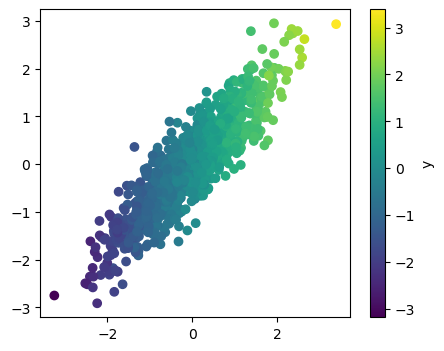

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 4) # Smaller default figure size

plt.figure()
X_full, y_full = generate_without_missing_values(1000)
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full)
plt.colorbar(label='y')

### Missing completely at random 

Wir entfernen jetzt zufällig Daten


In [3]:
def generate_mcar(n_samples, missing_rate=.2, rng=42):
    X_full, y = generate_without_missing_values(n_samples, rng=rng)
    if not isinstance(rng, np.random.RandomState):
        rng = np.random.RandomState(rng)

    M = rng.binomial(1, missing_rate, (n_samples, 2))
    X_mcar = X_full.copy()
    np.putmask(X_mcar, M, np.nan)

    return X_full, X_mcar, y

Plot der Daten mit missing values

Fehlende Werte sind grau.



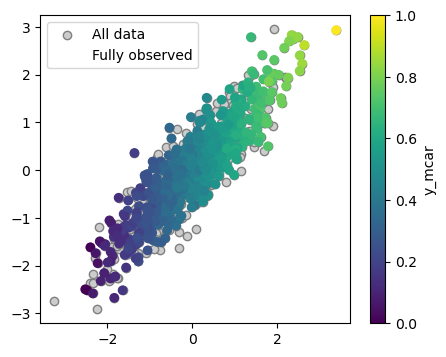

In [4]:
X_full, X_mcar, y_mcar = generate_mcar(1000)

plt.figure()
plt.scatter(X_full[:, 0], X_full[:, 1], color='.8', ec='.5', label='All data')
plt.colorbar(label='y_mcar')
plt.scatter(X_mcar[:, 0], X_mcar[:, 1], c=y_mcar, label='Fully observed')
plt.legend()

### Not missing at random

Größere Werte fehlen eher als kleiner



In [5]:
def generate_censored(n_samples, missing_rate=.4, rng=42):
    X_full, y = generate_without_missing_values(n_samples, rng=rng)
    if not isinstance(rng, np.random.RandomState):
        rng = np.random.RandomState(rng)

    B = rng.binomial(1, 2 * missing_rate, (n_samples, 2))
    M = (X_full > 0.5) * B
    
    X_nmar = X_full.copy()
    np.putmask(X_nmar, M, np.nan)

    return X_full, X_nmar, y

Wieder ein Plot


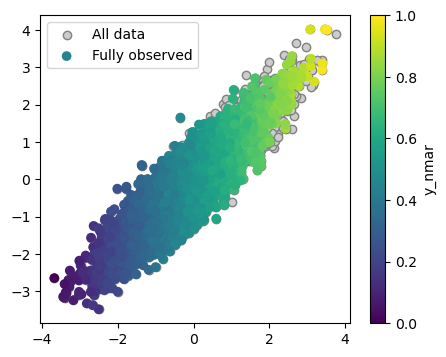

In [6]:
X_full, X_nmar, y_nmar = generate_censored(10000, missing_rate=.2)

plt.figure()
plt.scatter(X_full[:, 0], X_full[:, 1], color='.8', ec='.5',
            label='All data')
plt.colorbar(label='y_nmar')
plt.scatter(X_nmar[:, 0], X_nmar[:, 1], c=y_nmar, label='Fully observed')
plt.legend()

## Aufgaben

- MAR
    - Wandeln Sie die Funktion ```generate_mcar``` so ab, dass die Daten statt *missing completely at random* nur noch die Bedingung *missing at random* erfüllen.


- Auffüllen
    - Füllen Sie in beiden Fällen die Daten mit einem Iterativen Imputen auf
    - Füllen Sie in beiden Fällen die Daten mit einem SimpleImputer (z.Bsp. dem mean) auf
    - Visualisieren Sie die aufgefüllten Daten

- Modell trainieren
    - Trainieren Sie eine lineare Regression auf den aufgefüllten Daten und vergleichen Sie die Ergebnisse mit einer 10-fachen Kreuzvalidierung
    - Trainieren Sie zum Vergleich ein Modell mit ```HistGradientBoostingRegressor```. Dieses Modell kann mit fehlenden Werten umgehen.

- Mehr Daten
    - Erhöhen Sie die Datenmenge auf 10000 Punkte und vergleichen Sie wieder die Ergebnisse

```python
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
```



In [7]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ii = IterativeImputer()
si = SimpleImputer()
X_imputed = ii.fit_transform(X_mcar)

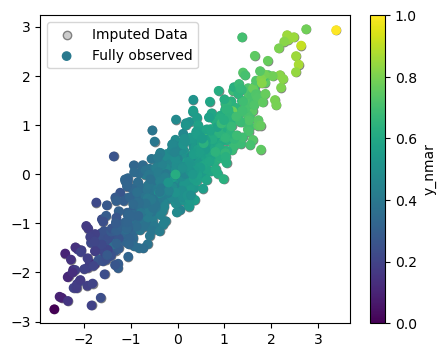

In [8]:
plt.figure()
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], color='.8', ec='.5',
            label='Imputed Data')
plt.colorbar(label='y_nmar')
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=y_mcar, label='Fully observed')
plt.legend()